In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings(action='ignore')

In [4]:
glass=pd.read_csv('glass.csv')

In [5]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [8]:
glass.keys()

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [9]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [15]:
glass.shape

(214, 10)

# Feature Engineering

In [16]:
glass.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [12]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [17]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [23]:
X=glass.drop(columns=['Type'],axis=1)

In [24]:
print(X)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [25]:
Y=glass['Type']

In [26]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


# Data Visualization

# Correlation

<Figure size 800x700 with 0 Axes>

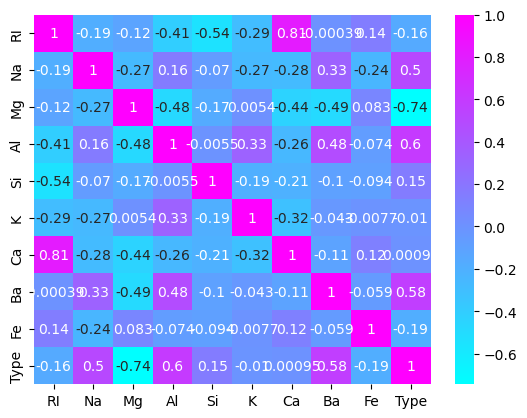

<Figure size 800x700 with 0 Axes>

In [31]:
corr_hmap = glass.corr()
sns.heatmap(corr_hmap,annot=True,cmap='cool')
plt.figure(figsize=(8,7))

In [ ]:
#shows positive correlation between Ba and Ca

# Count plot

<function matplotlib.pyplot.show(close=None, block=None)>

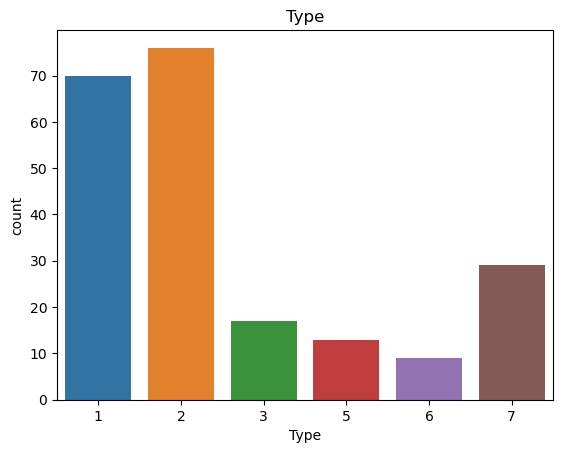

In [35]:
sns.countplot(x ='Type', data = glass)
plt.title('Type')
plt.show

In [ ]:
#showstype of  window glasses are more than type of non-window glasses

# Distplot

<function matplotlib.pyplot.show(close=None, block=None)>

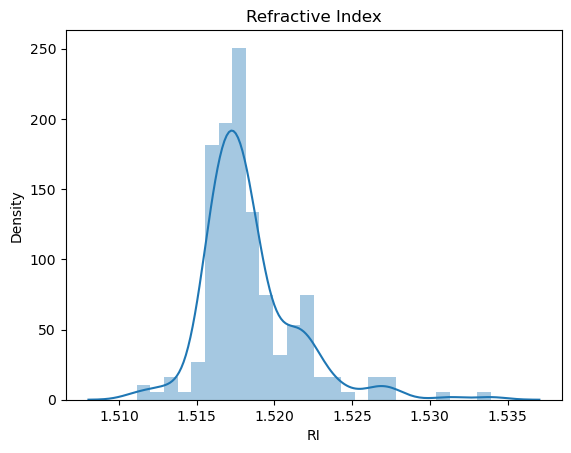

In [38]:
sns.distplot(glass['RI'])
plt.title('Refractive Index')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

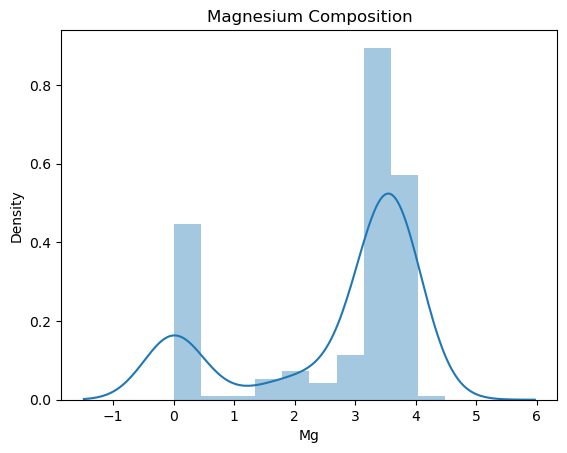

In [40]:
sns.distplot(glass['Mg'])
plt.title('Magnesium Composition')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

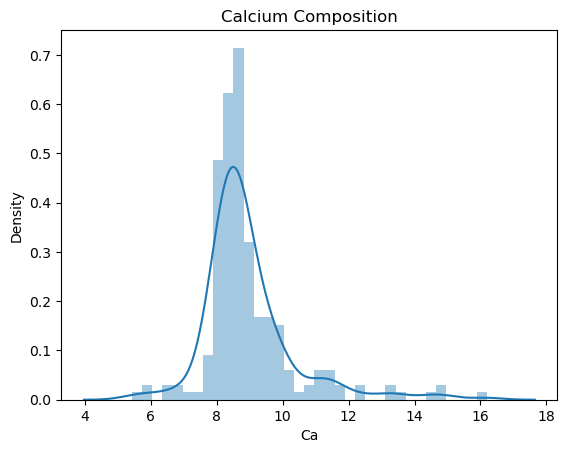

In [41]:
sns.distplot(glass['Ca'])
plt.title('Calcium Composition')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

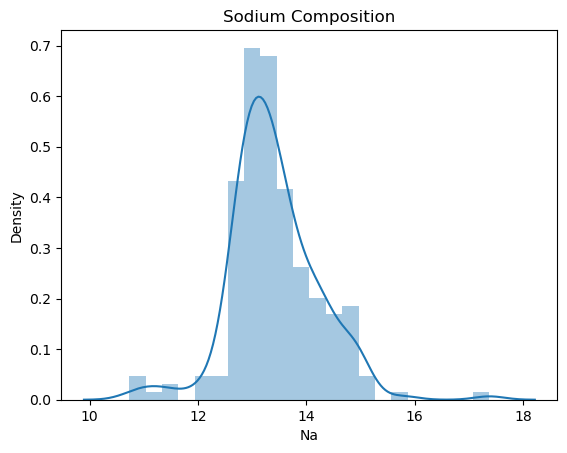

In [42]:
sns.distplot(glass['Na'])
plt.title('Sodium Composition')
plt.show

# Bar Plot

<Axes: xlabel='Type', ylabel='Na'>

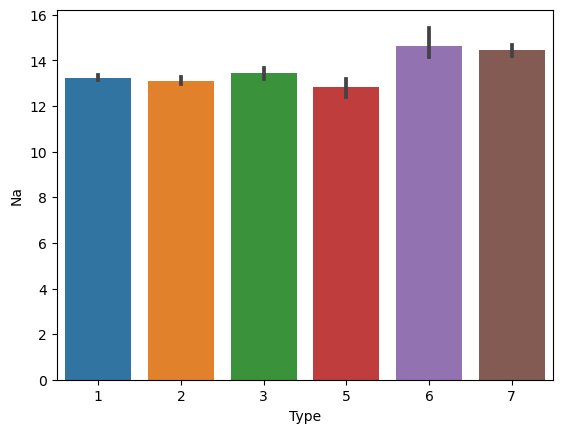

In [44]:
sns.barplot(x='Type',y='Na',data=glass)

<Axes: xlabel='Type', ylabel='Fe'>

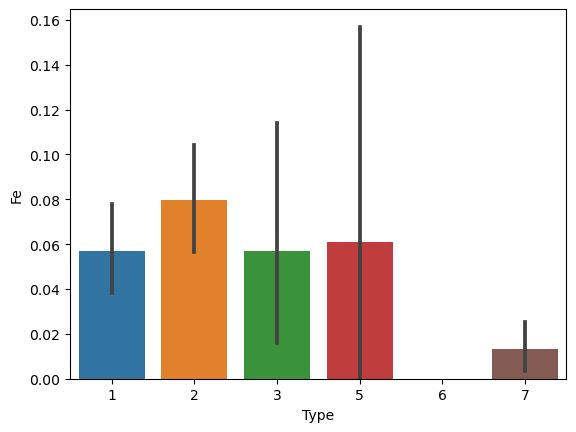

In [45]:

sns.barplot(x='Type',y='Fe',data=glass)

<Axes: xlabel='Type', ylabel='Ca'>

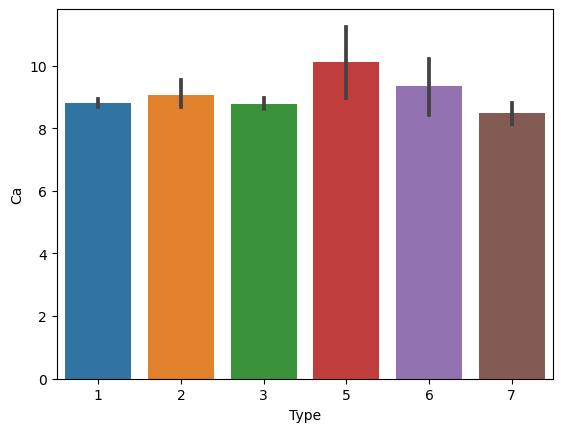

In [46]:

sns.barplot(x='Type',y='Ca',data=glass)

<Axes: xlabel='Type', ylabel='Mg'>

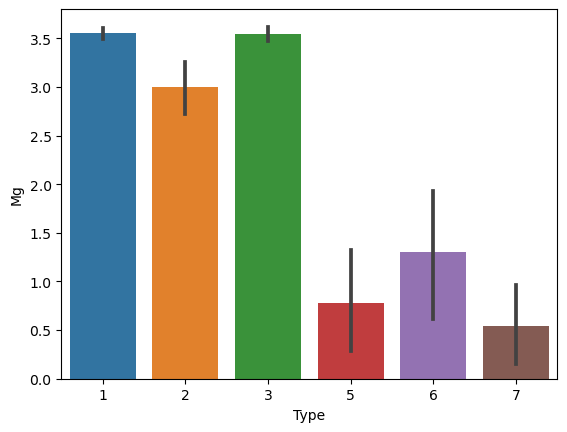

In [47]:

sns.barplot(x='Type',y='Mg',data=glass)

# Violin Plot

<Axes: xlabel='Type', ylabel='RI'>

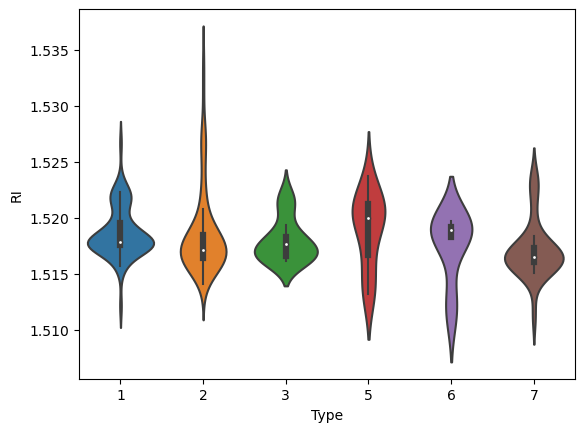

In [48]:
sns.violinplot(x='Type',y='RI',data=glass)

<Axes: xlabel='Type', ylabel='Al'>

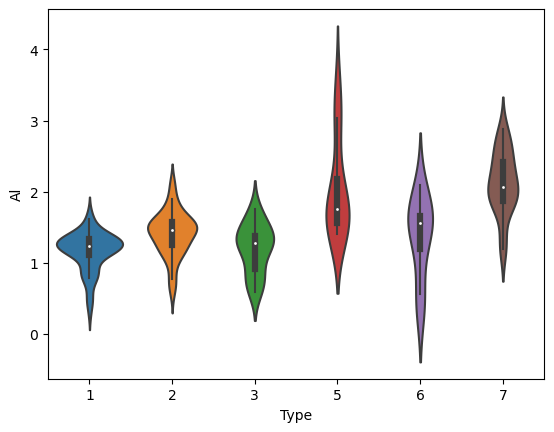

In [50]:
sns.violinplot(x='Type',y='Al',data=glass)

<Axes: xlabel='Type', ylabel='K'>

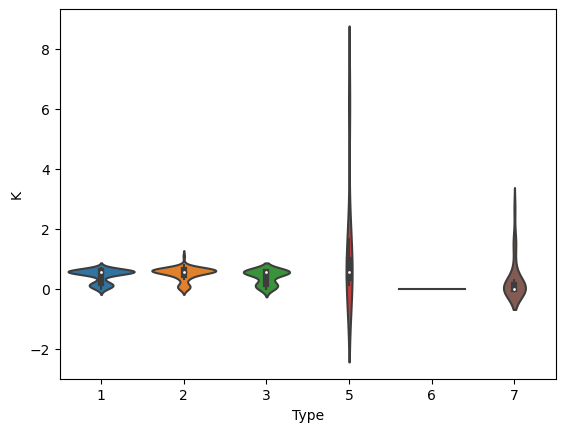

In [52]:
sns.violinplot(x='Type',y='K',data=glass)

<Axes: xlabel='Type', ylabel='Ba'>

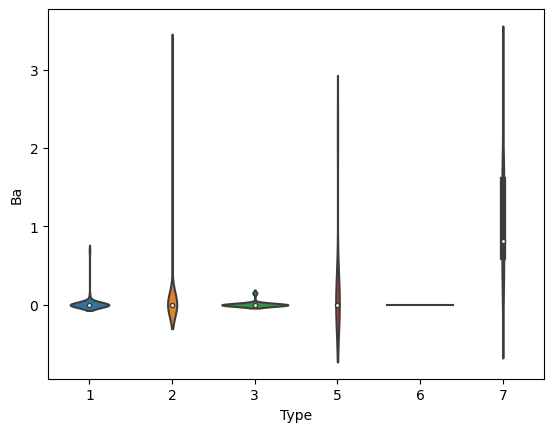

In [53]:
sns.violinplot(x='Type',y='Ba',data=glass)

In [54]:
glass.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

# Box Plot

RI         Axes(0.125,0.712609;0.168478x0.167391)
Na      Axes(0.327174,0.712609;0.168478x0.167391)
Mg      Axes(0.529348,0.712609;0.168478x0.167391)
Al      Axes(0.731522,0.712609;0.168478x0.167391)
Si         Axes(0.125,0.511739;0.168478x0.167391)
K       Axes(0.327174,0.511739;0.168478x0.167391)
Ca      Axes(0.529348,0.511739;0.168478x0.167391)
Ba      Axes(0.731522,0.511739;0.168478x0.167391)
Fe          Axes(0.125,0.31087;0.168478x0.167391)
Type     Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

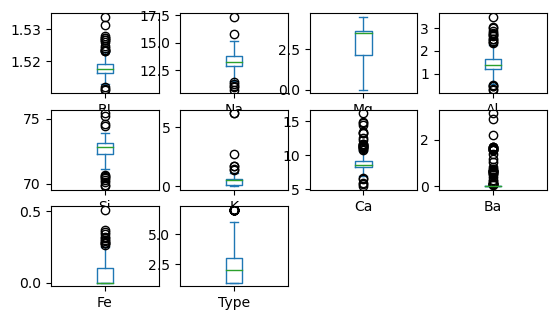

In [59]:
glass.plot(kind='box',subplots=True,layout=(4,4))

In [99]:
# the box plot shpws there are some outliers present in some of the key variables.

In [60]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(glass))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [61]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [62]:
glass_new=glass[(z<3).all(axis=1)]

In [64]:
glass.shape

(214, 10)

In [65]:
glass_new.shape

(194, 10)

In [66]:
glass=glass_new
glass.shape

(194, 10)

# Histogram

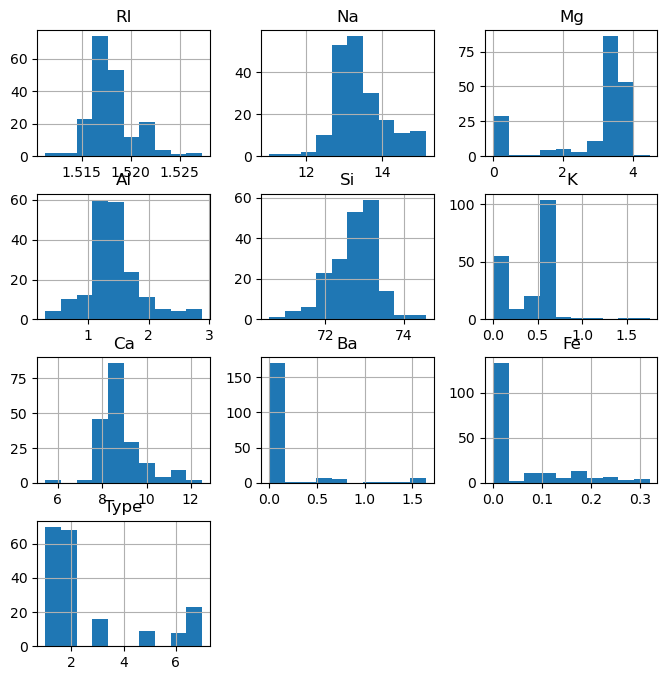

In [67]:
glass.hist(figsize=(8,8),bins=10)
plt.show()

# Pair Plot

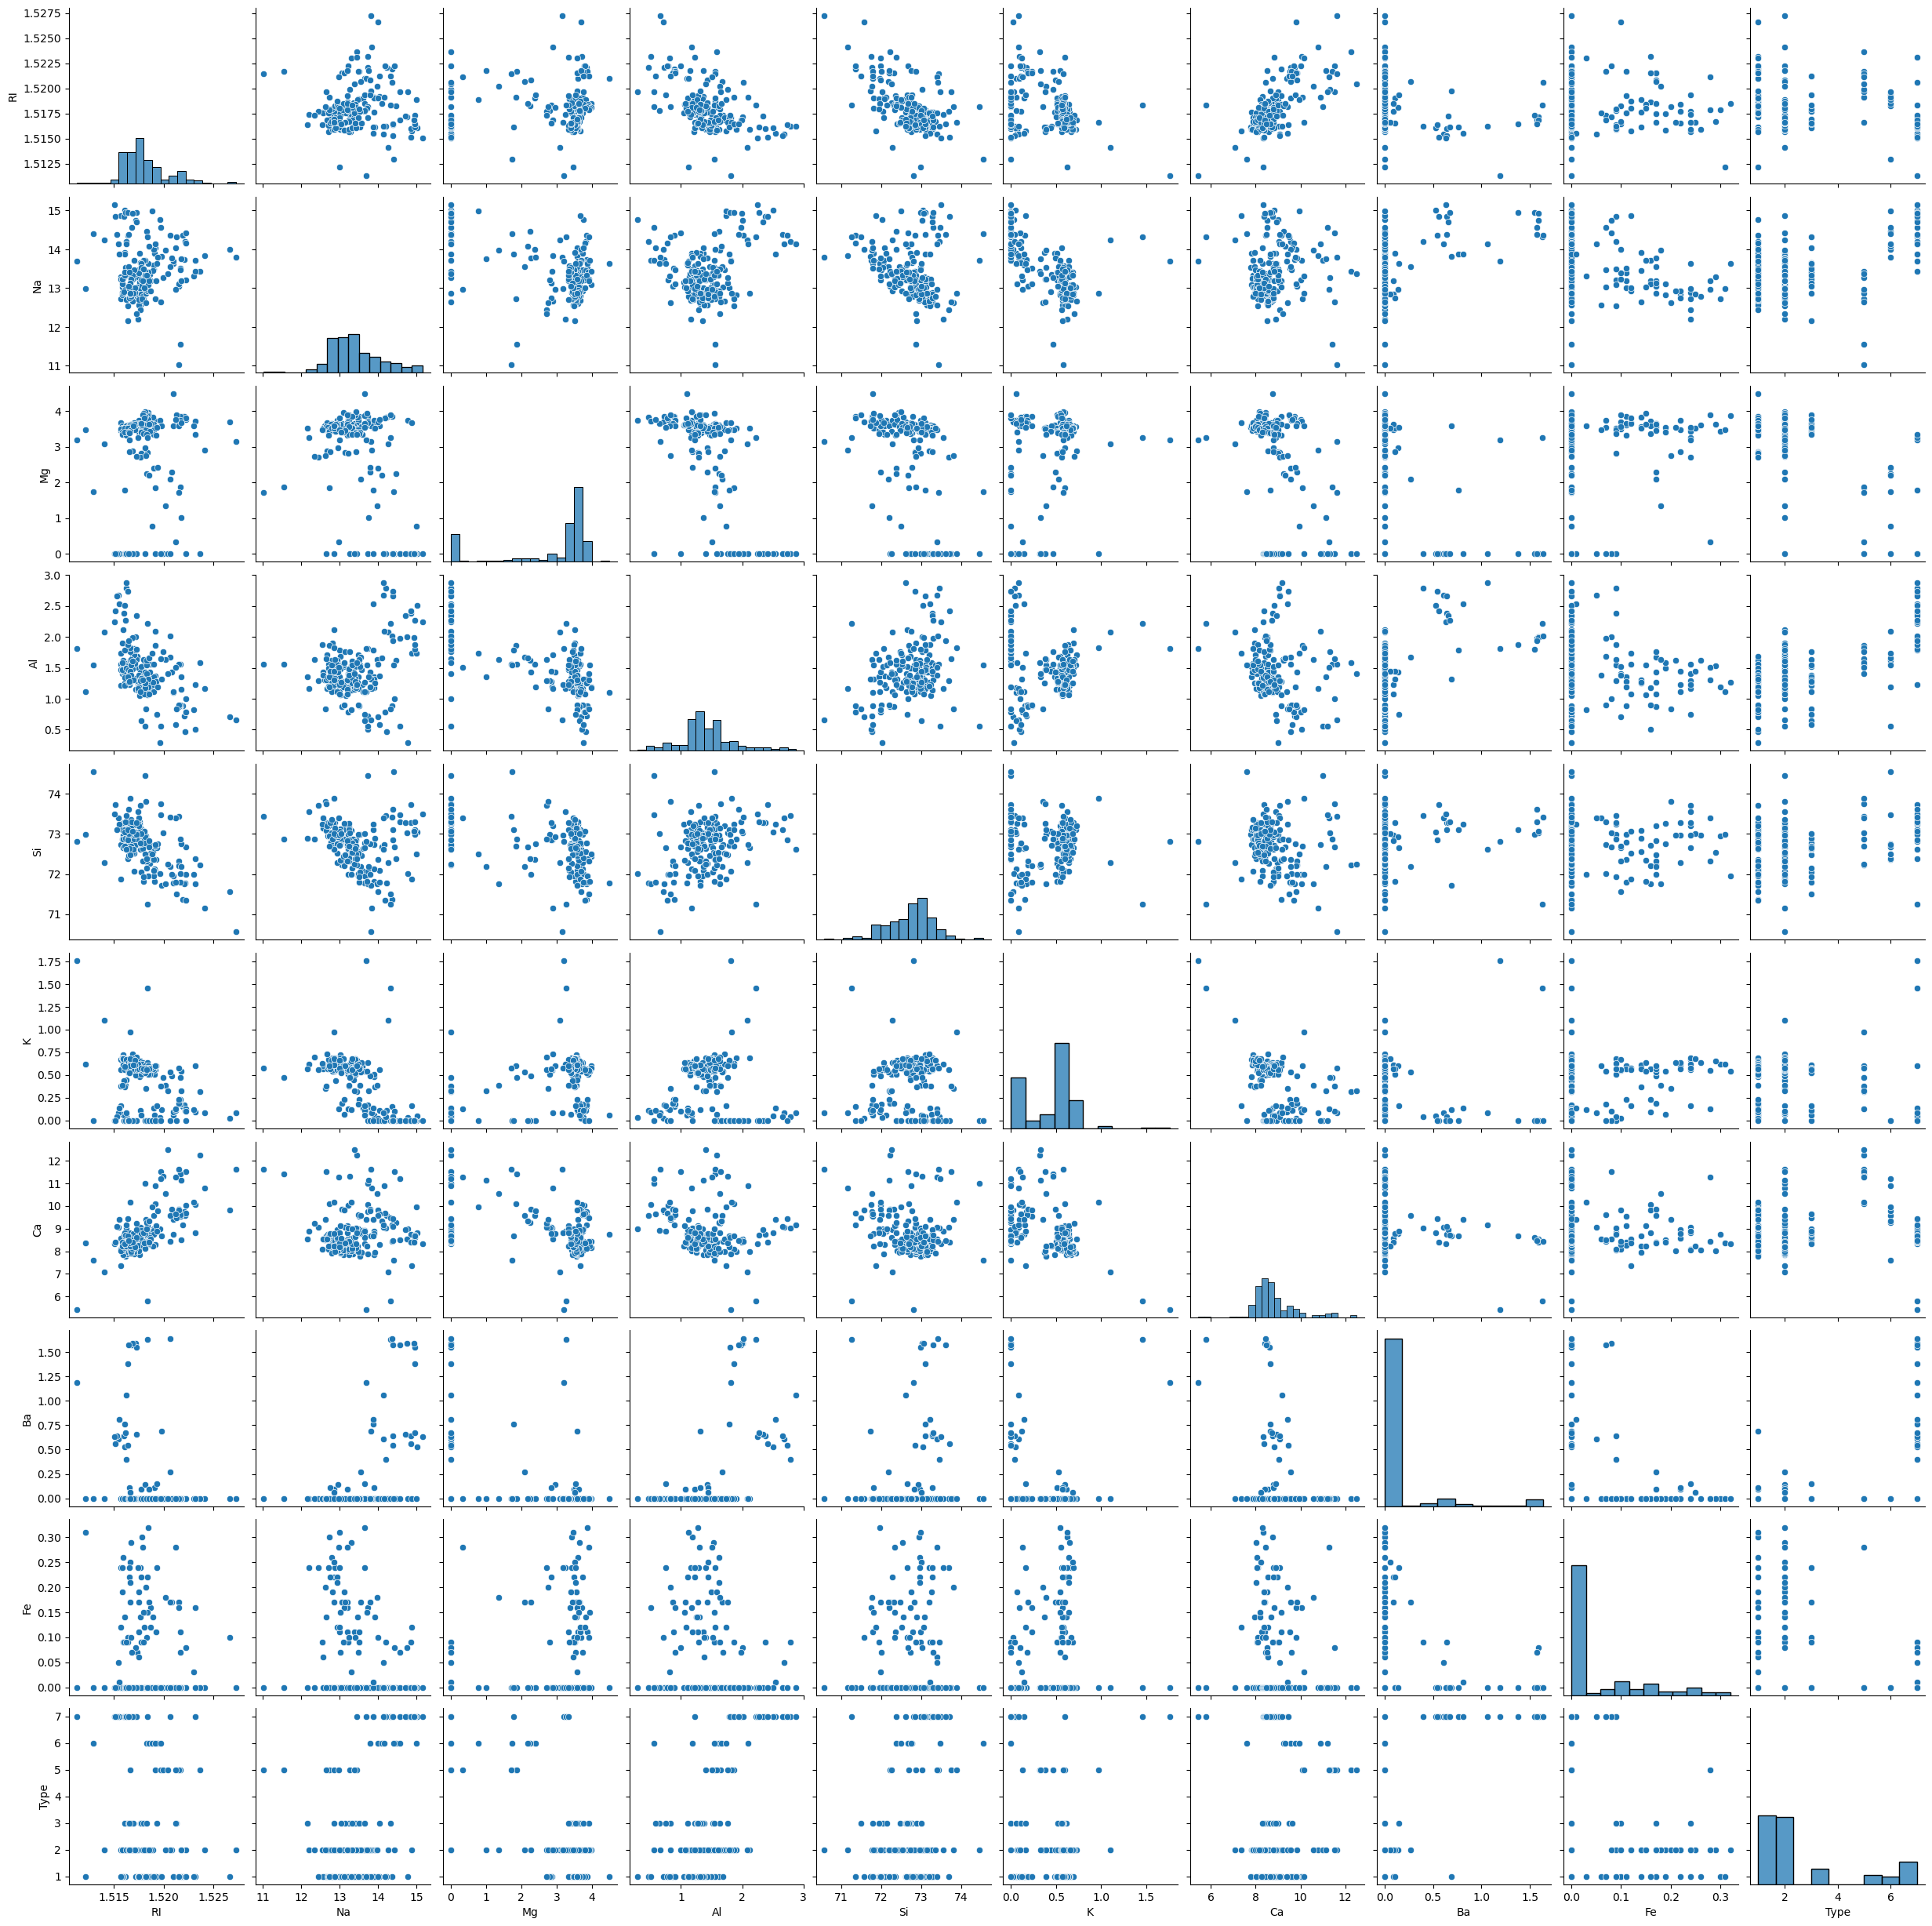

In [68]:
sns.pairplot(glass)

# Scatter Plot

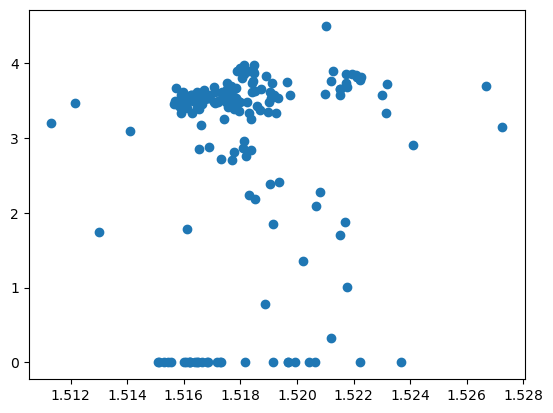

In [71]:
plt.scatter(glass['RI'],glass['Mg'])
plt.show()

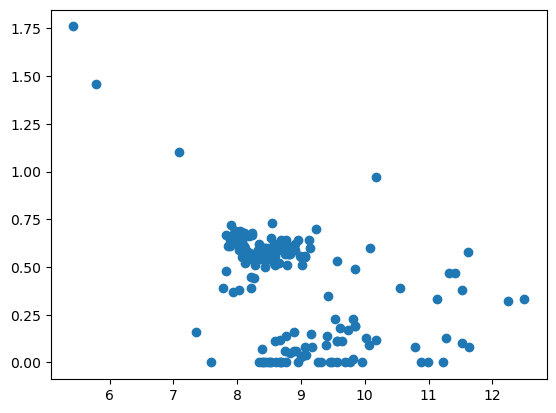

In [72]:
plt.scatter(glass['Ca'],glass['K'])
plt.show()

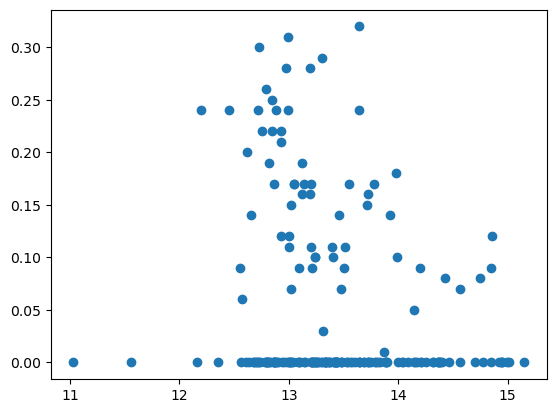

In [73]:
plt.scatter(glass['Na'],glass['Fe'])
plt.show()

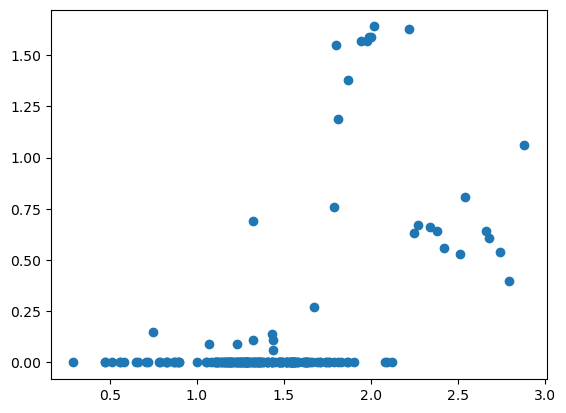

In [74]:
plt.scatter(glass['Al'],glass['Ba'])
plt.show()

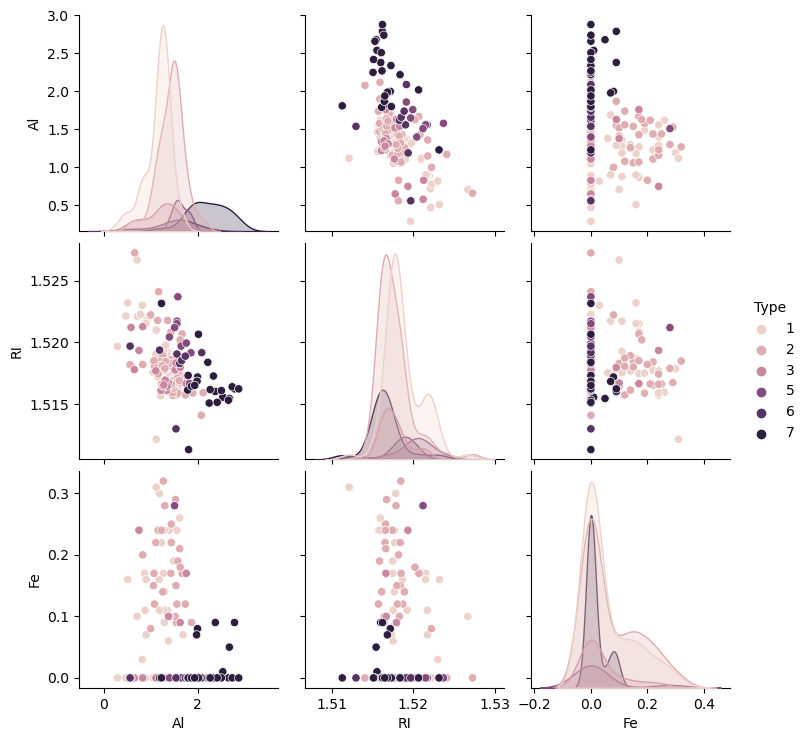

In [75]:
sns.pairplot(data=glass,hue='Type',vars=['Al','RI','Fe'])

# Joint Plot

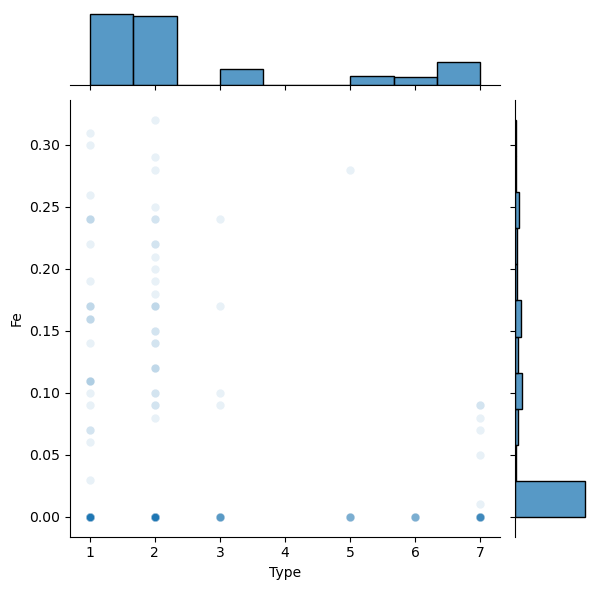

In [76]:
from scipy.stats import pearsonr
sns.jointplot(x='Type', y='Fe', data=glass, alpha = 0.1)


sns.barplot(x='Type',y='Fe',data=glass)

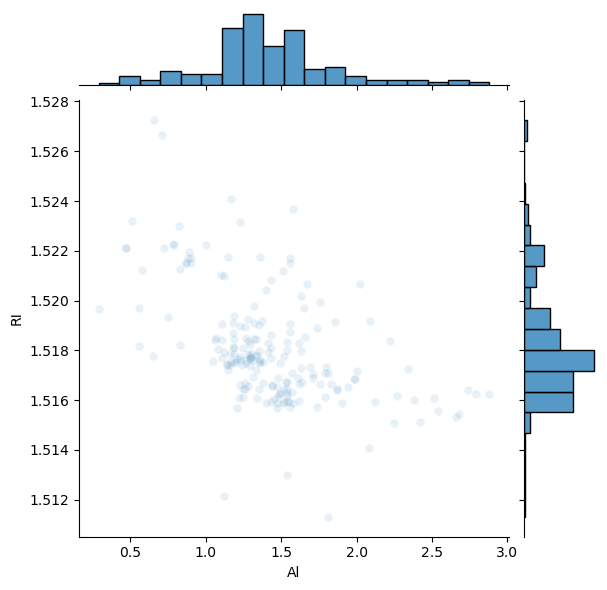

In [77]:

sns.jointplot(x='Al', y='RI', data=glass, alpha = 0.1)

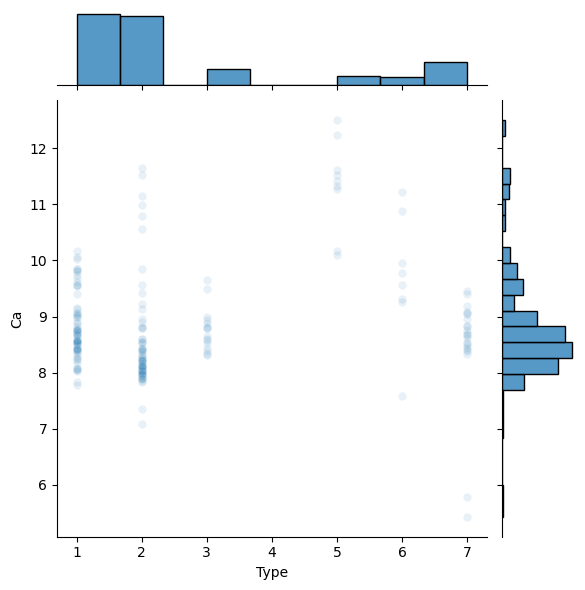

In [79]:
sns.jointplot(x='Type', y='Ca', data=glass, alpha = 0.1)

<Axes: xlabel='Type', ylabel='Density'>

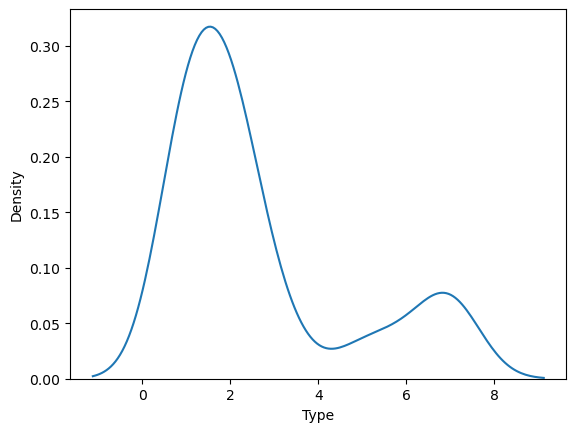

In [80]:
sns.kdeplot(data=glass.Type)

<Axes: xlabel='RI', ylabel='Density'>

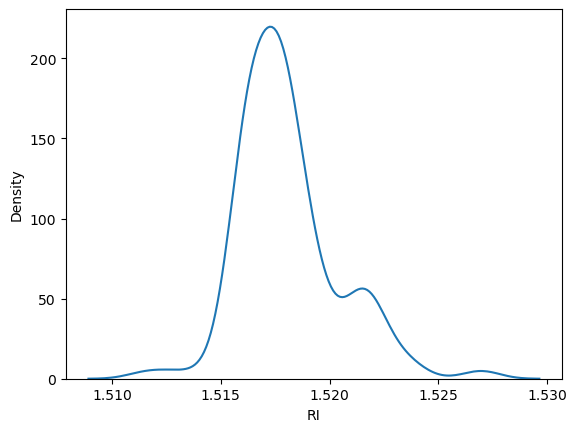

In [81]:
sns.kdeplot(data=glass.RI)

<Axes: xlabel='K', ylabel='Density'>

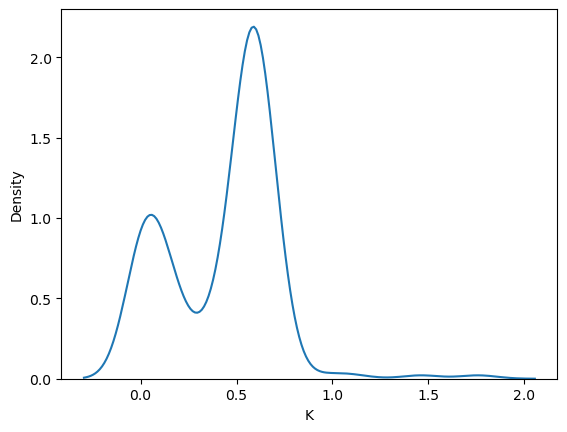

In [83]:
sns.kdeplot(data=glass.K)

# Training The Model

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [85]:
X_train.shape

(149, 9)

In [86]:
Y_train.shape

(149,)

In [87]:
X_test.shape

(65, 9)

In [88]:
Y_test.shape

(65,)

In [89]:
#logistic regression
lg=LogisticRegression()

In [90]:
#training the model
lg.fit(X_train,Y_train)

LogisticRegression()

In [91]:
#testing the model
pred=lg.predict(X_test)

In [92]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 7, 2, 1, 2, 2, 2, 7, 1, 2, 7, 2, 7,
       7, 7, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1, 2,
       1, 7, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 2, 1, 1, 7, 2],
      dtype=int64)

In [93]:
accuracy_score(Y_test,pred)

0.6615384615384615

In [94]:
print(confusion_matrix(Y_test,pred))

[[15  4  0  0  0  0]
 [ 5 17  0  0  0  1]
 [ 2  2  0  0  0  0]
 [ 0  5  0  1  0  0]
 [ 0  1  0  0  0  2]
 [ 0  0  0  0  0 10]]


<Axes: >

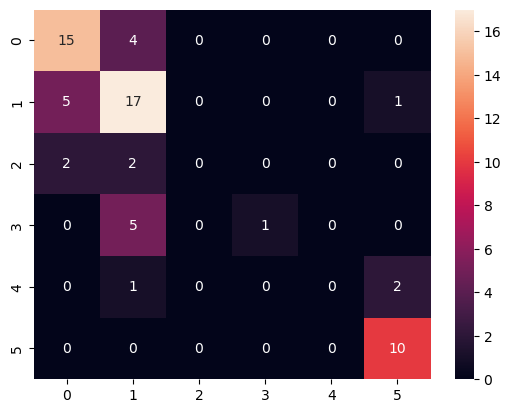

In [95]:
c=confusion_matrix(Y_test,pred)
sns.heatmap(c,annot=True)

In [96]:
def glasspred(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    print('predicted value:',pred)
    if pred==1:
        print('Window Glass')
    else:
        print('Non Window Glass')

In [97]:
p=np.array([1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0])
glasspred(p)

predicted value: [1]
Window Glass


In [98]:
#applying machine learning models collectively
lg=LogisticRegression()
mnb=MultinomialNB()
gb=GaussianNB()
knn=KNeighborsClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

model=lg,mnb,gb,knn,svc,dtc,rfc

for m in model:
    
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    
    print('Accuracy score of ',m,' is:')
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression()  is:
0.6615384615384615
[[15  4  0  0  0  0]
 [ 5 17  0  0  0  1]
 [ 2  2  0  0  0  0]
 [ 0  5  0  1  0  0]
 [ 0  1  0  0  0  2]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.68      0.79      0.73        19
           2       0.59      0.74      0.65        23
           3       0.00      0.00      0.00         4
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         3
           7       0.77      1.00      0.87        10

    accuracy                           0.66        65
   macro avg       0.51      0.45      0.42        65
weighted avg       0.62      0.66      0.61        65



Accuracy score of  MultinomialNB()  is:
0.5384615384615384
[[15  4  0  0  0  0]
 [12 11  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 0  3  0  1  0  2]
 [ 0  1  0  0  0  2]
 [ 0  2  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.48

In [100]:
#Random Forest classifier gives the most appropriate method to predict the type of window glass.